<a href="https://colab.research.google.com/github/unkind58/Project_Football_Kits_Classifier/blob/main/football_kits_classifier_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *

from google.colab import drive
from IPython.display import Image

In [8]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
path = Path('/content/gdrive/MyDrive/Projects/Data')

%cd /content/gdrive/MyDrive/Projects/Data

/content/gdrive/MyDrive/Projects/Data


In [10]:
!ls

'ADO Den Haag'		  'Fortuna Sittard'	  'Portland Timbers'
'Club Atletico Aldosivi'  'Manchester United FC'  'Sunderland AFC'
'FC Nantes'		   models		  'West Bromwich Albion FC'
'FC Neman Grodno'	  'Norwich City FC'


In [14]:
np.random.seed(58)
dls = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,
                                  ds_tfms=get_transforms(), 
                                  size=224, 
                                  num_workers=4, 
                                  bs=16).normalize(imagenet_stats)

In [15]:
dls.classes, dls.c, len(dls.train_ds),len(dls.valid_ds)

(['ADO Den Haag',
  'Club Atletico Aldosivi',
  'FC Nantes',
  'FC Neman Grodno',
  'Fortuna Sittard',
  'Manchester United FC',
  'Norwich City FC',
  'Portland Timbers',
  'Sunderland AFC',
  'West Bromwich Albion FC'],
 10,
 196,
 48)

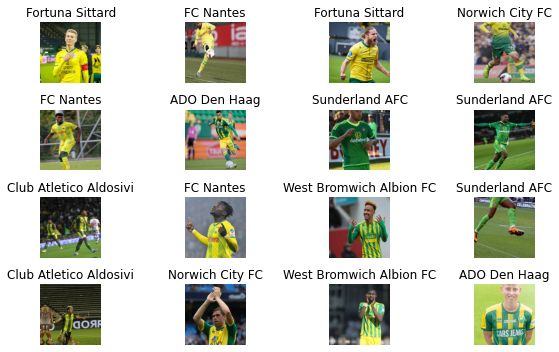

In [16]:
dls.show_batch(rows=4, figsize=(8,5))

In [17]:
learn = cnn_learner(dls,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [18]:
learn.fit_one_cycle(6)

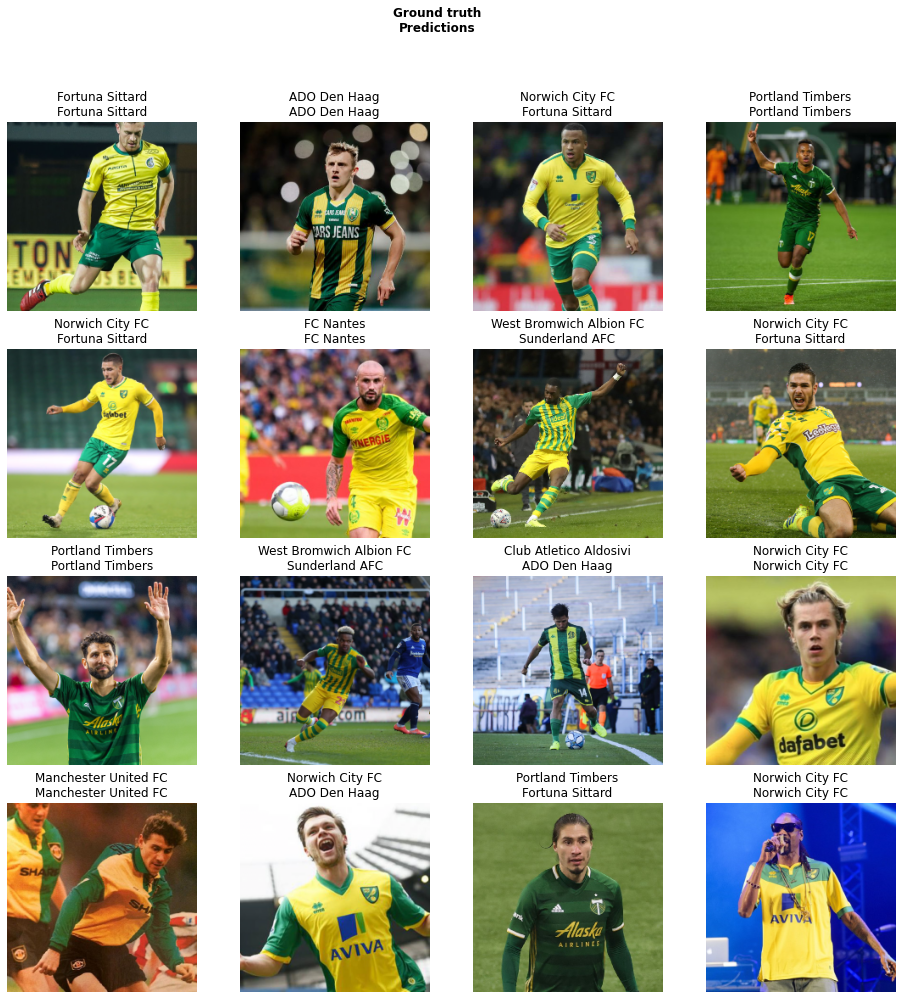

In [19]:
learn.show_results()

In [20]:
learn.save('stage-1')

In [21]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [27]:
#  dls.valid_ds.items

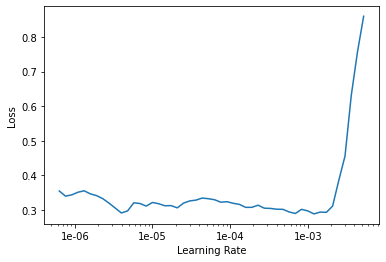

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(5, max_lr=slice(1e-4,3e-4))

In [26]:
learn.save('stage-2')

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

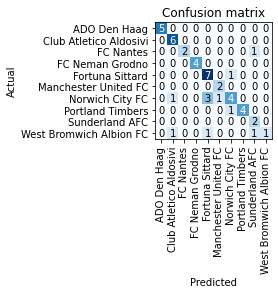

In [29]:
interp.plot_confusion_matrix()

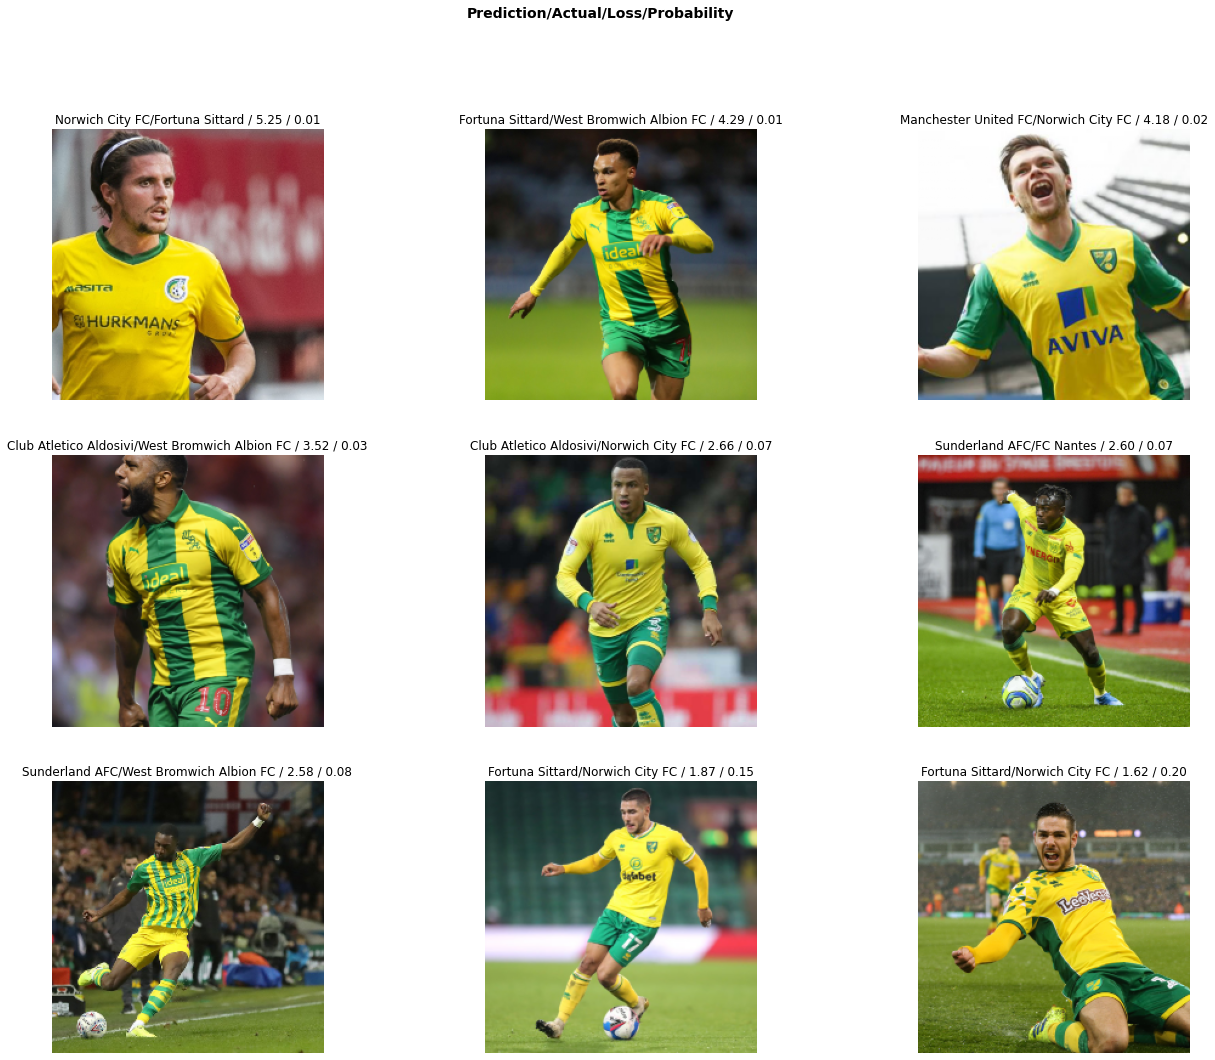

In [38]:
interp.plot_top_losses(9, figsize=(22,17))

In [35]:
learn.recorder.plot()

AttributeError: ignored

In [ ]:
learn.load('stage-1')

In [32]:
# interp_losses = Interpretation.from_learner(learn)
# interp_losses.plot_top_losses(9, figsize=(15,10))

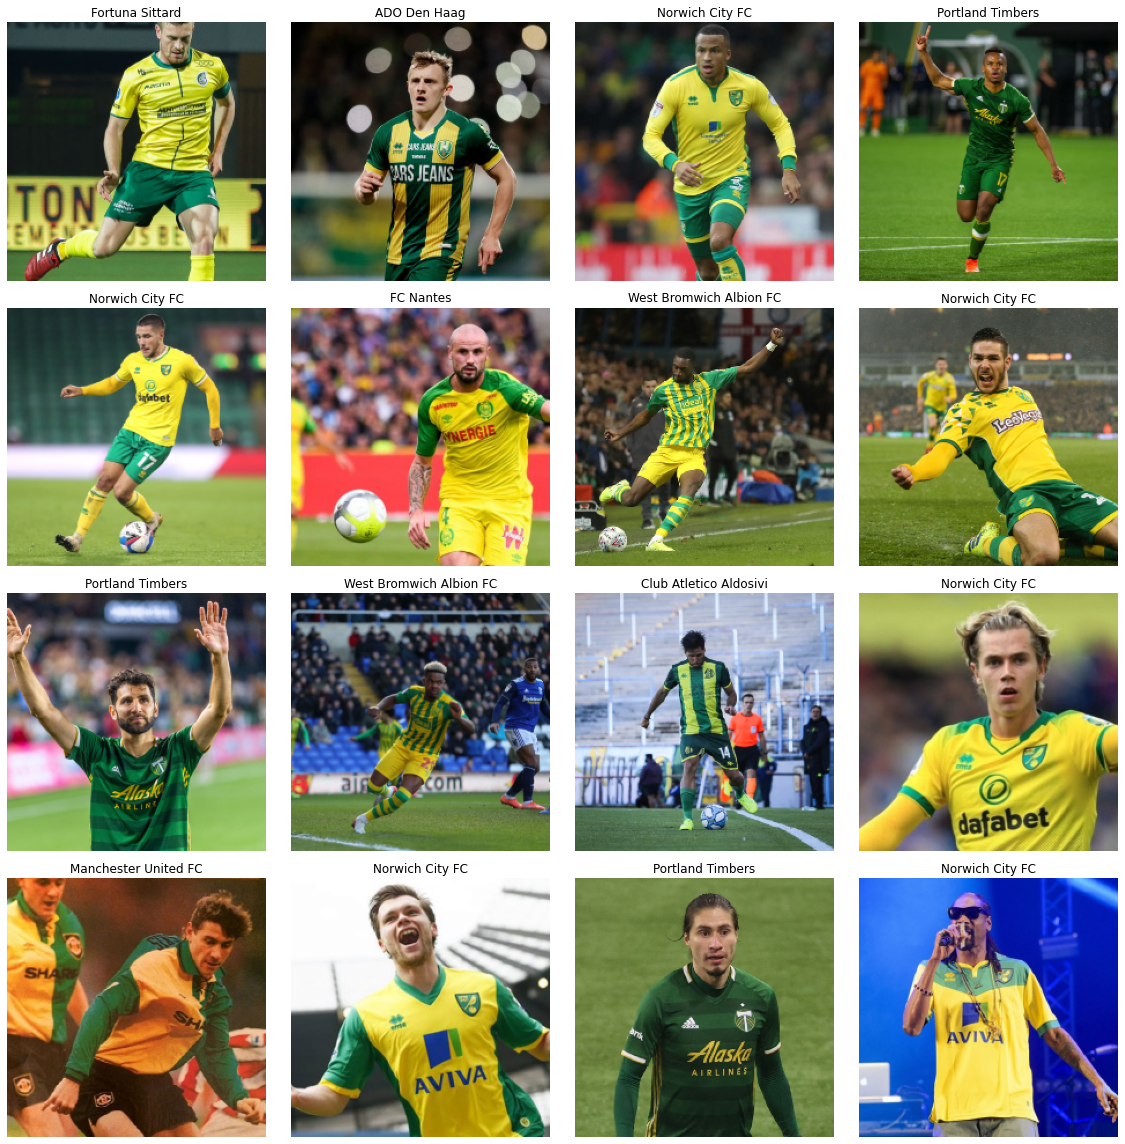

In [33]:
dls.show_batch(ds_type=DatasetType.Valid)

In [ ]:
# *aug_transforms TO-DO
#  recorder.plot.loss